In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline


# For ordinal encoding categorical variables, splitting data
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OrdinalEncoder, FunctionTransformer, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#To Pipeline the process 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# For training random forest model
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.model_selection import cross_val_score, KFold

#Grid Search
from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor
from xgboost import cv
from xgboost import plot_importance
from sklearn.decomposition import PCA

#from yellowbrick.target import FeatureCorrelation

import tensorflow as tf
import matplotlib as mpl
import xgboost as XGB

Data Fetch

In [103]:
raw_test_data = pd.read_csv('test.csv')
raw_train_data = pd.read_csv('train.csv',index_col=0)

Getting familiar with Data

In [59]:
raw_test_data.shape,raw_train_data.shape

((200000, 24), (300000, 25))

In [60]:
raw_train_data.head(10)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
2,B,B,A,A,B,D,A,F,A,O,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
3,A,A,A,C,B,D,A,D,A,F,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
4,B,B,A,C,B,D,A,E,C,K,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
6,A,A,A,C,B,D,A,E,A,N,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260
7,A,B,A,C,B,D,A,E,G,F,...,0.392432,0.658169,0.997473,0.569874,0.960864,0.238050,0.316065,0.731729,0.694719,8.028558
8,B,A,A,A,B,D,A,E,C,F,...,0.396705,0.273454,0.824573,0.656325,0.677114,0.808445,0.615973,0.631677,0.283561,7.811465
9,A,A,A,C,B,B,A,E,A,M,...,0.633353,0.339760,0.802006,1.010997,0.391221,0.057297,0.591120,0.074629,0.775869,7.674188
10,A,B,A,C,B,D,A,E,G,I,...,0.472564,0.414036,0.809142,1.013301,0.761183,1.041711,0.393960,0.782381,0.865610,8.090095


In [61]:
raw_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1 to 499999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10  300000 non-null  float64
 21  cont11  30

In [62]:
raw_train_data.describe(include='all')

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
unique,2,2,2,4,4,4,8,8,7,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,A,A,A,C,B,B,A,E,C,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,193130,154824,253886,263356,294737,149340,290511,276040,111103,71249,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634


In [63]:
raw_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 499995
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    200000 non-null  object 
 1   cat1    200000 non-null  object 
 2   cat2    200000 non-null  object 
 3   cat3    200000 non-null  object 
 4   cat4    200000 non-null  object 
 5   cat5    200000 non-null  object 
 6   cat6    200000 non-null  object 
 7   cat7    200000 non-null  object 
 8   cat8    200000 non-null  object 
 9   cat9    200000 non-null  object 
 10  cont0   200000 non-null  float64
 11  cont1   200000 non-null  float64
 12  cont2   200000 non-null  float64
 13  cont3   200000 non-null  float64
 14  cont4   200000 non-null  float64
 15  cont5   200000 non-null  float64
 16  cont6   200000 non-null  float64
 17  cont7   200000 non-null  float64
 18  cont8   200000 non-null  float64
 19  cont9   200000 non-null  float64
 20  cont10  200000 non-null  float64
 21  cont11  20

Preparing Data for Traing and Testing

In [64]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_features  = [cname for cname in raw_train_data.columns if
                    raw_train_data[cname].nunique() <= 15 and 
                    raw_train_data[cname].dtype == "object"]

# Select numerical columns
numeric_features  = [cname for cname in raw_train_data.columns if 
                raw_train_data[cname].dtype in ['int64', 'float64']]

In [65]:
#train_cat = raw_train_data.select_dtypes(object)
#test_cat = raw_test_data.select_dtypes(object)

In [66]:
features = categorical_features + numeric_features

In [67]:
#remove target column from Numeric features
numeric_features.remove('target')

Correlation between all features

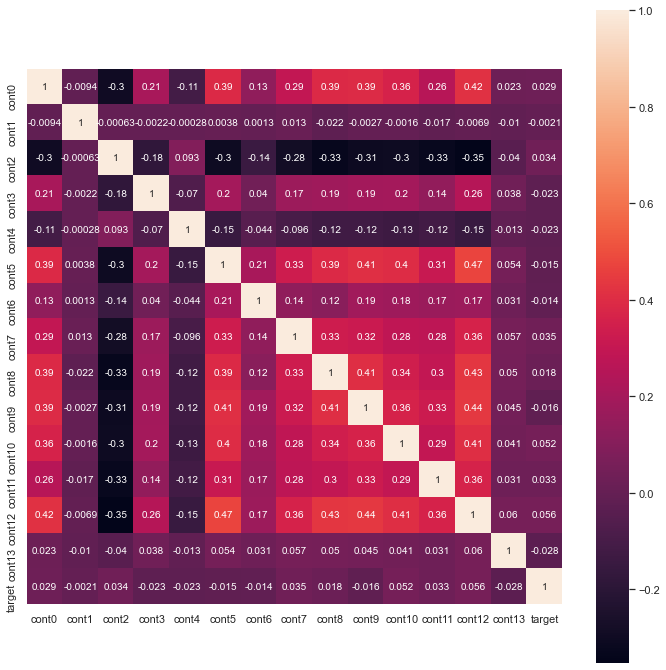

In [68]:
correlations = raw_train_data[features].corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(correlations, square=True, cbar=True, annot=True, vmax=1);

array([[<AxesSubplot:title={'center':'cont0'}>,
        <AxesSubplot:title={'center':'cont1'}>,
        <AxesSubplot:title={'center':'cont2'}>,
        <AxesSubplot:title={'center':'cont3'}>],
       [<AxesSubplot:title={'center':'cont4'}>,
        <AxesSubplot:title={'center':'cont5'}>,
        <AxesSubplot:title={'center':'cont6'}>,
        <AxesSubplot:title={'center':'cont7'}>],
       [<AxesSubplot:title={'center':'cont8'}>,
        <AxesSubplot:title={'center':'cont9'}>,
        <AxesSubplot:title={'center':'cont10'}>,
        <AxesSubplot:title={'center':'cont11'}>],
       [<AxesSubplot:title={'center':'cont12'}>,
        <AxesSubplot:title={'center':'cont13'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

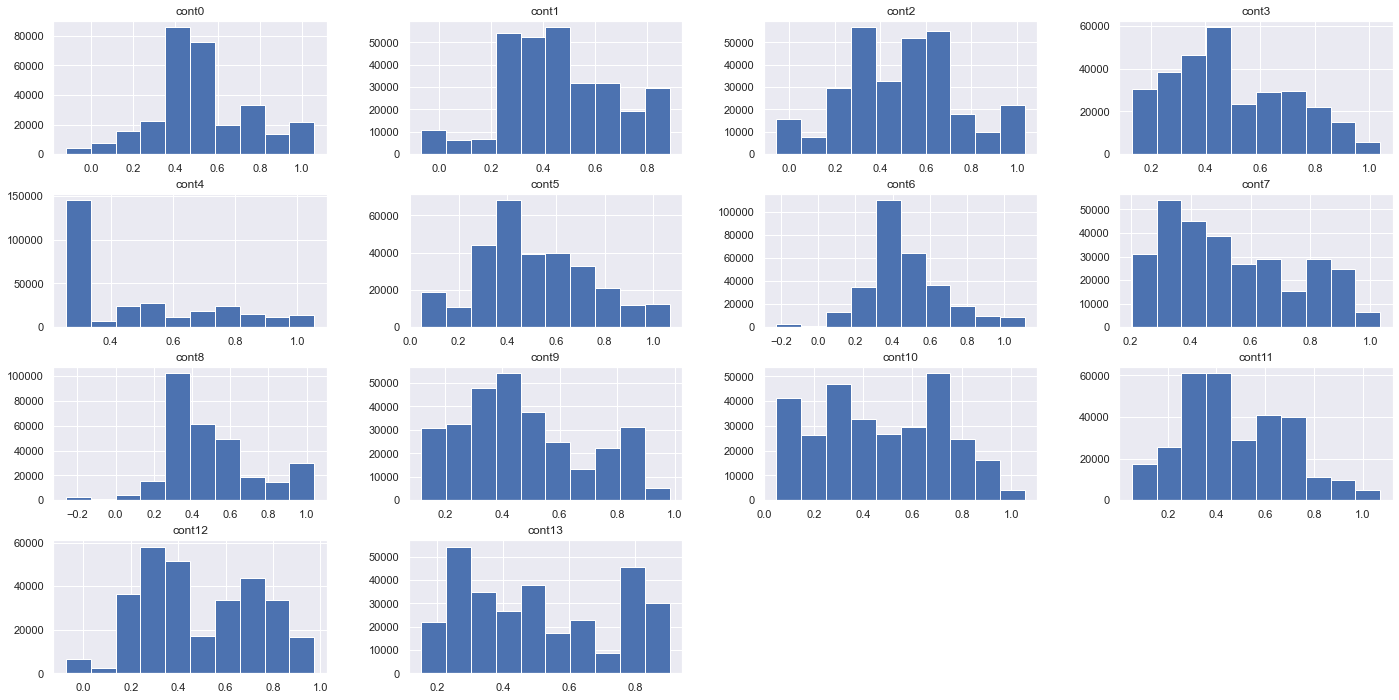

In [69]:
## Data Distribution of numeric features 
raw_train_data[numeric_features].hist(figsize=(24,12))

In [70]:
for col in numeric_features:
    print("Skewness of ",col, ": %f" % raw_train_data[col].skew())

Skewness of  cont0 : 0.236360
Skewness of  cont1 : 0.032677
Skewness of  cont2 : 0.082866
Skewness of  cont3 : 0.402795
Skewness of  cont4 : 0.776598
Skewness of  cont5 : 0.275822
Skewness of  cont6 : 0.507824
Skewness of  cont7 : 0.428809
Skewness of  cont8 : 0.540071
Skewness of  cont9 : 0.388129
Skewness of  cont10 : 0.056184
Skewness of  cont11 : 0.318717
Skewness of  cont12 : 0.101119
Skewness of  cont13 : 0.243352


To remove data skewness we use log transform

array([[<AxesSubplot:title={'center':'cont0'}>,
        <AxesSubplot:title={'center':'cont1'}>,
        <AxesSubplot:title={'center':'cont2'}>,
        <AxesSubplot:title={'center':'cont3'}>],
       [<AxesSubplot:title={'center':'cont4'}>,
        <AxesSubplot:title={'center':'cont5'}>,
        <AxesSubplot:title={'center':'cont6'}>,
        <AxesSubplot:title={'center':'cont7'}>],
       [<AxesSubplot:title={'center':'cont8'}>,
        <AxesSubplot:title={'center':'cont9'}>,
        <AxesSubplot:title={'center':'cont10'}>,
        <AxesSubplot:title={'center':'cont11'}>],
       [<AxesSubplot:title={'center':'cont12'}>,
        <AxesSubplot:title={'center':'cont13'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

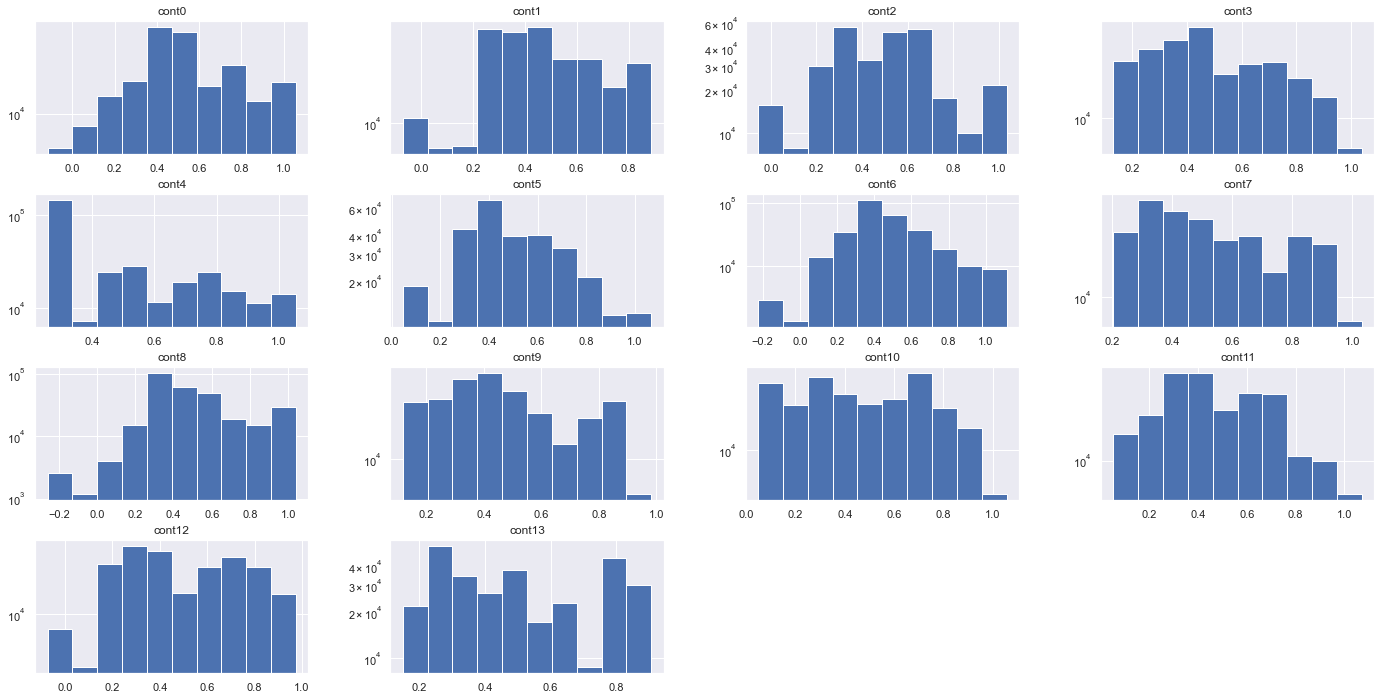

In [71]:
raw_train_data[numeric_features].hist(figsize=(24,12), log = True)

Removing Outliers to the Data

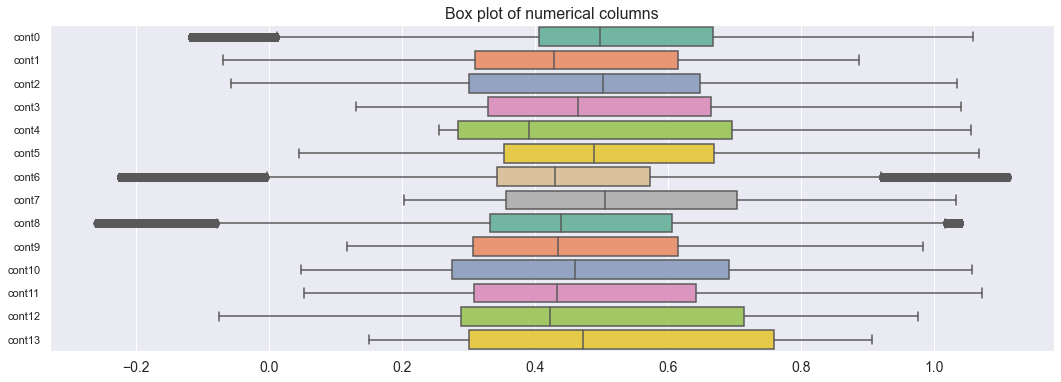

In [72]:
# Box Plot for Outliers
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=raw_train_data[numeric_features], orient="h", palette="Set2");
plt.xticks(fontsize= 14)
plt.title('Box plot of numerical columns', fontsize=16);

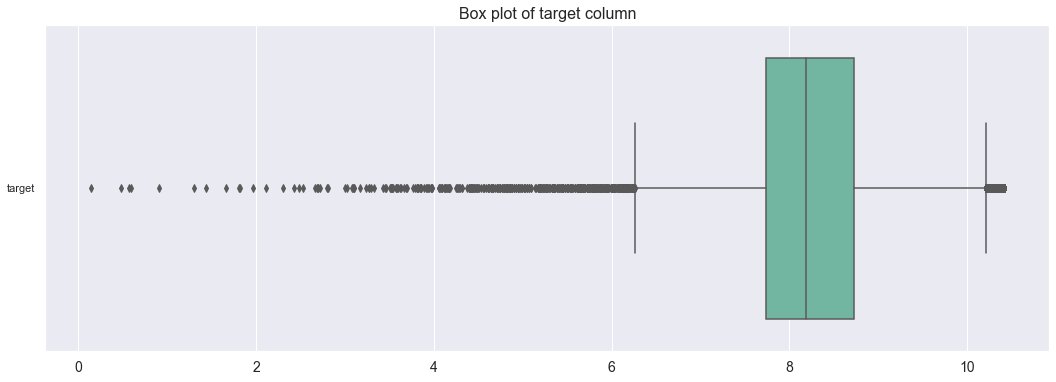

In [73]:
# outlier in target
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=raw_train_data[['target']], orient="h", palette="Set2" );
plt.xticks(fontsize= 14)
plt.title('Box plot of target column', fontsize=16);

In [74]:
# Deal with Outliers

from scipy import stats


def treatoutliers(df=None, columns=None, factor=1.5, method='IQR', treatment='cap'):

    for column in columns:
        if method == 'STD':
            permissable_std = factor * df[column].std()
            col_mean = df[column].mean()
            floor, ceil = col_mean - permissable_std, col_mean + permissable_std
        elif method == 'IQR':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            floor, ceil = Q1 - factor * IQR, Q3 + factor * IQR
            # print(floor, ceil)
        if treatment == 'remove':
            print(treatment, column)
            df = df[(df[column] >= floor) & (df[column] <= ceil)]
        elif treatment == 'cap':
            print(treatment, column)
            df[column] = df[column].clip(floor, ceil)

    return df

In [75]:
#remove outliere from target column 
#for colName in [['target']]:
    #X_full = treatoutliers(df=X_full,columns=colName, treatment='remove')         
    
#Quantile-based Flooring and Capping
for colName in [['target','cont0','cont6','cont8']]:
    raw_train_data = treatoutliers(df=raw_train_data,columns=colName, treatment='cap')      
    
raw_train_data.info()

cap target
cap cont0
cap cont6
cap cont8
<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1 to 499999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10 

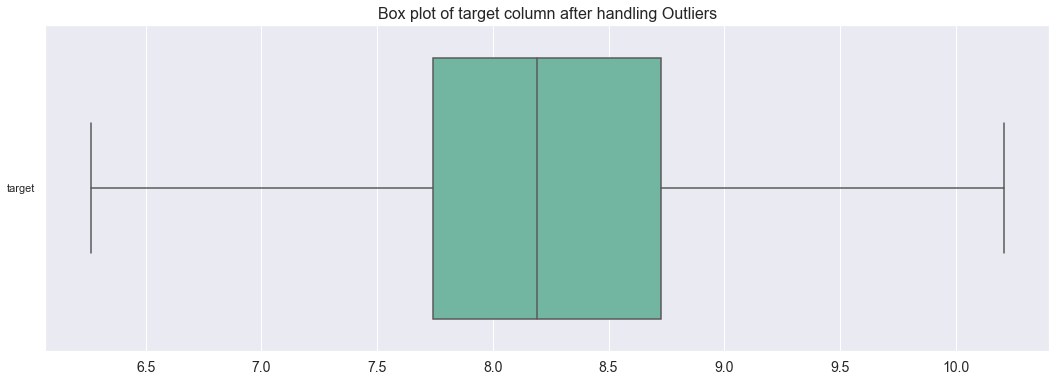

In [76]:
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=raw_train_data[['target']], orient="h", palette="Set2" );
plt.xticks(fontsize= 14)
plt.title('Box plot of target column after handling Outliers', fontsize=16);

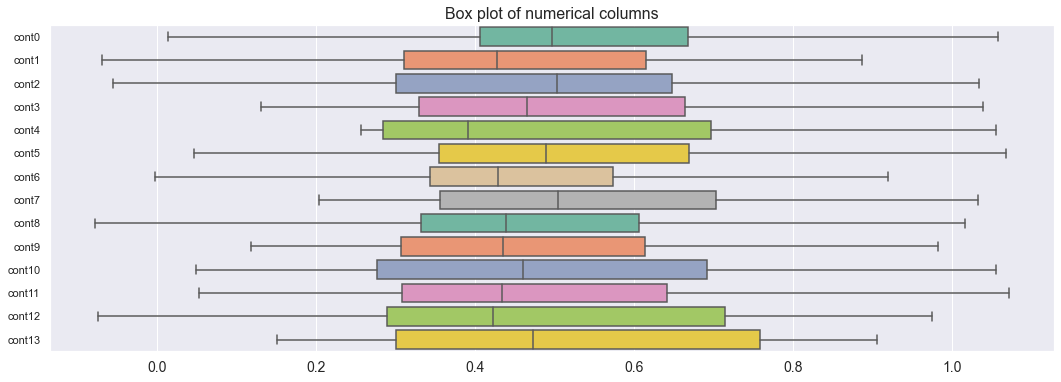

In [77]:

fig = plt.figure(figsize=(18,6))
sns.boxplot(data=raw_train_data[numeric_features], orient="h", palette="Set2");
plt.xticks(fontsize= 14)
plt.title('Box plot of numerical columns', fontsize=16);

In [78]:
# Deal with missing data
# No Misisng data in this dataset :)

In [79]:
# Remove rows with missing target, separate target from predictors
raw_train_data.dropna(axis=0, subset=['target'], inplace=True)
y = raw_train_data['target']
raw_train_data = raw_train_data.drop(['target'], axis=1)

In [81]:
features.remove('target')
X = raw_train_data[features]
X_test = raw_test_data[features]

Converting categorical to numerical

In [87]:
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [96]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=64)

In [92]:
X_train.head(10)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
271857,1,0,0,2,1,1,0,4,4,10,...,0.957309,0.699264,0.443024,0.880387,0.603501,0.495876,0.442189,0.340810,0.401832,0.808087
409035,0,0,0,0,1,3,0,4,2,5,...,0.582467,0.709216,0.546583,0.993682,0.608984,0.845457,0.509917,0.497418,0.672717,0.261492
303842,1,0,0,0,1,3,0,4,6,10,...,0.491044,0.676645,0.476258,0.716593,0.697894,0.826334,0.959732,0.741527,0.690953,0.781978
486149,1,1,0,2,1,1,0,4,2,8,...,0.770267,0.415050,0.526987,0.317244,0.354144,0.420214,0.692484,0.268109,0.191086,0.855109
207926,0,1,0,2,1,1,0,4,4,9,...,0.661823,0.291691,0.453448,0.204164,0.390963,0.435493,0.315439,0.121781,0.530621,0.296882
456887,1,1,0,2,1,1,0,4,4,13,...,0.305816,0.450530,0.432379,0.340696,1.001767,0.332193,0.353876,0.727930,0.610127,0.868656
201405,0,0,0,2,1,3,0,4,2,7,...,0.276681,0.735815,0.522610,0.705481,0.832648,0.750623,0.768573,0.714049,0.969132,0.798835
452572,0,1,0,2,1,3,0,4,0,8,...,0.562869,0.692539,0.503189,0.474894,0.455100,0.232927,0.146113,0.498179,0.551104,0.329649
449969,0,1,0,2,1,3,0,4,2,1,...,0.275072,0.570894,0.546193,0.758657,0.598250,0.344569,0.348325,0.396746,0.970134,0.865791


In [97]:
x_train.shape

(240000, 24)

Model and training

In [95]:
model = XGB.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =7, nthread = -1)

In [98]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1.7817, missing=nan, monotone_constraints='()',
             n_estimators=2200, n_jobs=4, nthread=-1, num_parallel_tree=1,
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, subsample=0.5213, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [99]:
model.score(x_valid,y_valid)

0.07276453890553025

In [101]:
raw_test_data.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
0,B,B,B,C,B,B,A,E,E,I,...,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
5,A,B,A,C,B,C,A,E,C,H,...,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
15,B,A,A,A,B,B,A,E,D,K,...,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099
16,B,B,A,C,B,D,A,E,A,N,...,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372
17,B,B,A,C,B,C,A,E,C,F,...,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412


Prepare Test data

In [104]:
test_id = raw_test_data.id

In [105]:
for col in categorical_features:
    le = LabelEncoder()
    X_test[col] = le.fit_transform(X_test[col])

Save Results in a File

In [106]:
y_predict = model.predict(X_test)

my_file = pd.DataFrame()

my_file['id'] = test_id
my_file['target'] = y_predict

In [107]:
my_file.to_csv('solution_s_v3.csv',index=False)

In [110]:
from sklearn.metrics import mean_absolute_error

cal_predict = model.predict(x_valid)

print("Mean Absolute Error: " + str(mean_absolute_error(cal_predict, y_valid)))

Mean Absolute Error: 0.567005918119533
